### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- exploring the structure using decision trees (Week 2)
- exploring clusters in customer behaviour (Week 3)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 4)
- loading, transforming and visualising data in R (Week 5)
- statistical analysis and modelling in R (Week 6)

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and goodness of fit metrics to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

In [5]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.stats.api as sms

## Functions

In [7]:
#Return unique_counts, duplicate_count, summary_stats
def validate_data(df):
    """ 
    This function validates the data and checks for data types, unique values, missing values
    duplicates, summary stats etc.
    """
    #check for basic data frame info and data types
    print("\n DataFrame info:")
    dataframe_info = df.info()
    
    #check for unique values
    unique_counts = df.nunique()
    print("\nUnique values per column:")
    print(unique_counts)

    #check for missing values
    missing_values_count = df.isna().sum()
    print("\nNumber of missing values:")
    print(missing_values_count)
    
    #checking for duplicates
    duplicate_count = df.duplicated().sum()
    print("\nNumber of duplicate rows:")
    print(duplicate_count)
    
    #summary stats
    summary_stats = df.describe()
    print("\nSummary statistics:")
    print(summary_stats)
    
    
#Returns histogram + smooth curve (clearer idea of the underlying shape of the data).
def plot_histogram(df, column):
    """
    Plots a histogram to explore the distribution of a specified column in the DataFrame.
    """
    # Check if the column exists in the DataFrame
    if column not in df.columns:
        print(f"Error: Column '{column}' does not exist in the DataFrame.")
        return
    
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f"{column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


# Returns countplot.
def plot_countplot (df, column):
    """
    Plots a countplot to explore distribution of categorical column from the DataFrame.
    """
    # Check if the column exists in the DataFrame
    if column not in df.columns:
        print(f"Error: Column '{column}' does not exist in the DataFrame.")
        return
        
    # Plot countplot. 
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column, hue=column, palette='Set2', legend=False)
    plt.title(f"{column}")
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()
    
   
# Returns boxplot.
def plot_boxplot(df, column):
    """
    Plots a boxplot to explore the distribution, spread, and outliers of a specified column in the DataFrame.
    """
    # Check if the column exists in the DataFrame.
    if column not in df.columns:
        print(f"Error: Column '{column}' does not exist in the DataFrame.")
        return

    # Plotting the boxplot.
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
    plt.show()

# Returns scatterplot.
def plot_scatter(df, x_col, y_col):
    """
    Plots a basic scatter plot with labeled axes.
    REMEMBER TO ADD plt.title() and plt.show()
    
    Parameters:
    - df: DataFrame containing the data
    - x_col: str, name of the column for x-axis
    - y_col: str, name of the column for y-axis
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[x_col], y=df[y_col], alpha=0.5)
    plt.xlabel(x_col.replace('_', ' ').capitalize())
    plt.ylabel(y_col.replace('_', ' ').capitalize())
   

## 1. Load and validate the data

In [9]:
# Load the CSV file(s) as reviews.
df = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
df.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [10]:
# Sense-check data set to determine data types, unique values, missing values, duplicates, summary stats.
validate_data(df)


 DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB

Unique values per column:
gender                       2
age                         45
remuneration (k£)           64
sp

#### Data type for 'product'.
As per metadata product column holds unique codes and not numeric values, hence dtype should be object.

In [12]:
# Change produts dtype to object.
df['product'] = df['product'].astype('object')
df.dtypes

gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                    object
review                     object
summary                    object
dtype: object

## 2. Drop columns

In [14]:
# Drop unnecessary 'language' and 'platform' columns from the DataFrame.
df1 = df.drop(columns=['language', 'platform'])

# Display the updated DataFrame
df1.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 3. Rename columns

In [16]:
# Rename the column headers.
df1 = df1.rename(columns={
    'remuneration (k£)': 'remuneration', 
    'spending_score (1-100)':'spending_score'
})

# View column names.
df1.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 4. Save the DataFrame as a CSV file and re-import

In [18]:
# Create a CSV file as output.
df1.to_csv('df1.csv', index=False)


In [19]:
# Import new CSV file with Pandas.
df2 = pd.read_csv('df1.csv')

# Explicitly converting the 'product' column back to 'object' dtype as Pandas read is as integer otherwise
df2['product'] = df2['product'].astype('object')

# View DataFrame.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   object 
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 140.8+ KB


## 5. Linear regression

### General

In [22]:
# Creat dataframe with numeric columns only to print corelation matrix for comparison.
df3 = df2[['age', 'remuneration', 'spending_score', 'loyalty_points']]
df3.corr()

,age,remuneration,spending_score,loyalty_points
age,1.000000,-0.005708,-0.224334,-0.042445
remuneration,-0.005708,1.000000,0.005612,0.616065
spending_score,-0.224334,0.005612,1.000000,0.672310
loyalty_points,-0.042445,0.616065,0.672310,1.000000


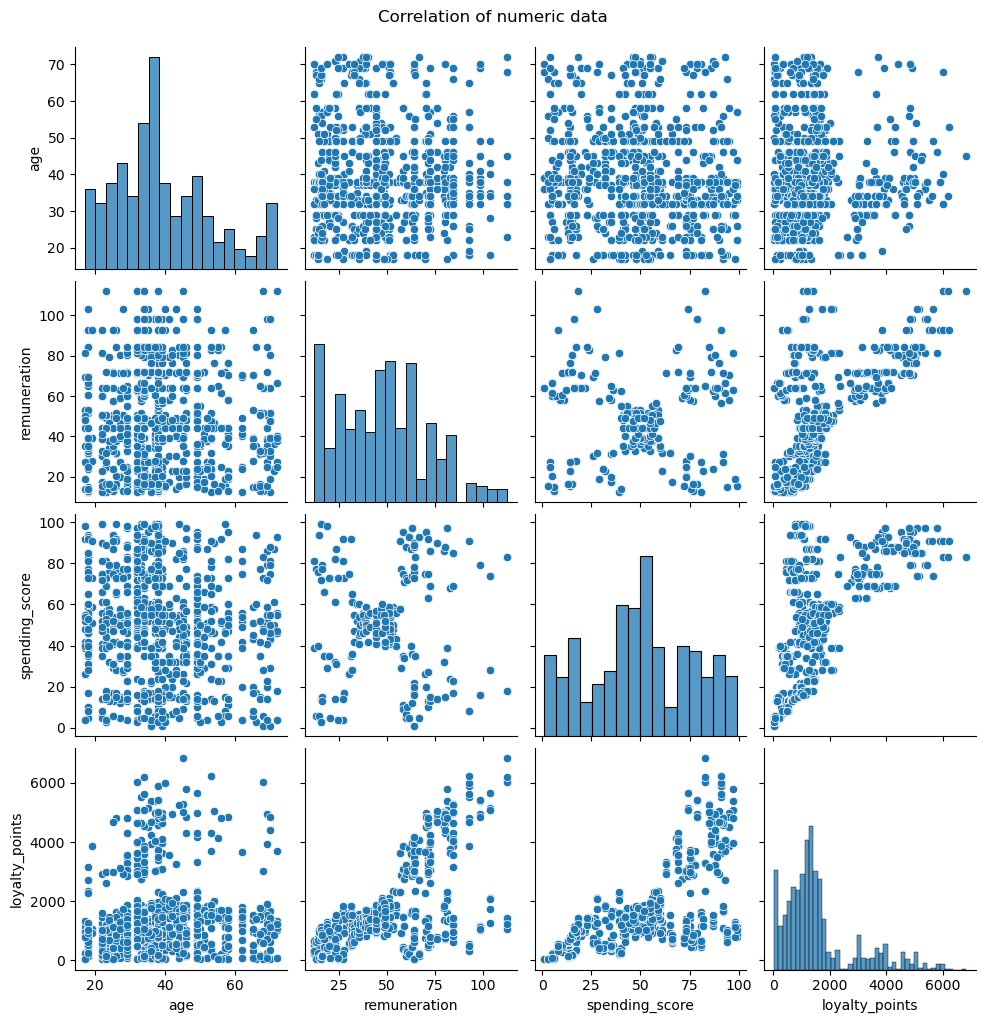

In [23]:
# Pairplot for original data
sns.pairplot(df3, kind='scatter')
plt.suptitle('Correlation of numeric data', y=1.02)
plt.show()

### Target variable loyalty_points

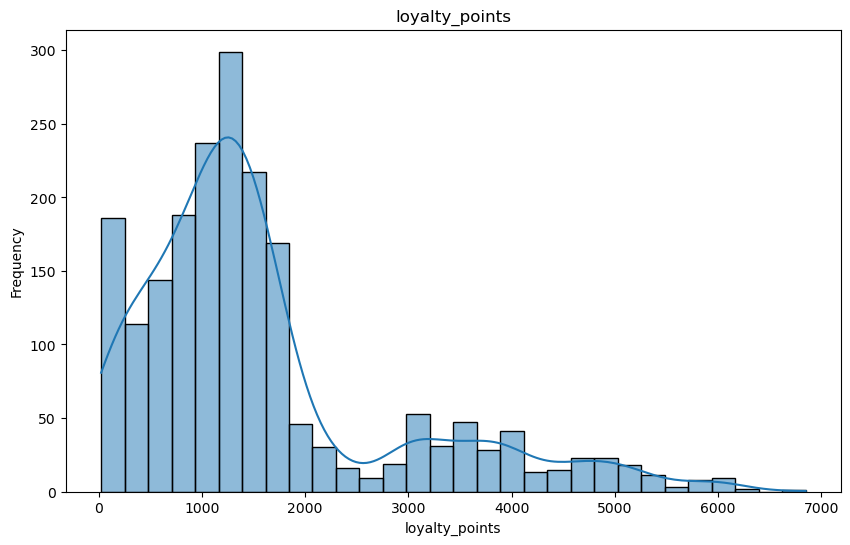

In [25]:
# distribution of loyalty_points
plot_histogram(df3, 'loyalty_points')

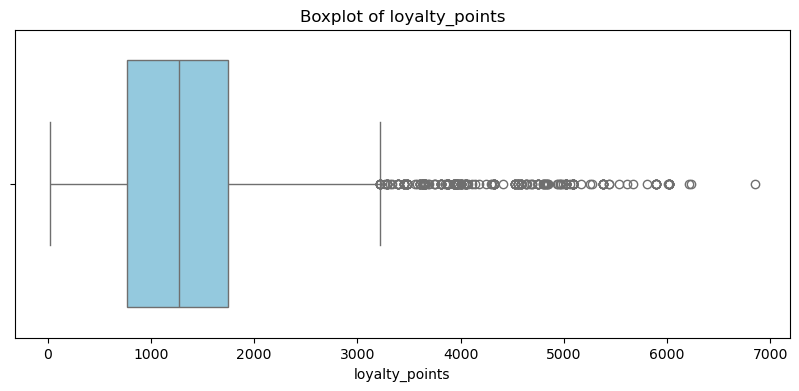

In [26]:
# Outliers, spread of loyalty points.
plot_boxplot(df3, 'loyalty_points')

In [27]:
# Central tendency & spread.
print(df3['loyalty_points'].describe())

# Mean vs median.
mean_val = df3['loyalty_points'].mean()
median_val = df3['loyalty_points'].median()
print(f"Mean: {mean_val}, Median: {median_val}")

count    2000.000000
mean     1578.032000
std      1283.239705
min        25.000000
25%       772.000000
50%      1276.000000
75%      1751.250000
max      6847.000000
Name: loyalty_points, dtype: float64
Mean: 1578.032, Median: 1276.0


In [28]:
# Outliers
Q1 = df3['loyalty_points'].quantile(0.25)
Q3 = df3['loyalty_points'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df3[(df3['loyalty_points'] < lower_bound) | (df3['loyalty_points'] > upper_bound)]
print(f"Outliers are above this number of loyalty points: {upper_bound}")
print(f"Number of outliers: {len(outliers)}")


Outliers are above this number of loyalty points: 3220.125
Number of outliers: 266


## Observations:

1. Correlation matrix shows:
    * remuneration and loyalty points have a strong positive relationship.
    * spending score and loyalty points are also strongly positively correlated.
    * age weak or no significant relationships with loyalty points and the other variables.
    * remuneration and spending Score have very weak positive correlation (slightly related).

2. Pairplot of numeric columns shows linearity between loyalty points and remuneration as well as spending score, but not with age
3. Target value - loyalty points:
    * has long right skew distribution with mean (1,578) notably higher than median (1,276), indicating the presence of high-value outliers.
    * large standard deviation with wide gap between min and max values reinsforces wide variability
    * just of 13% of loyalty point holders (266) fall into outliers category (>3220).
    * the stats support the split of the dataset for clearer modeling and interpretation, however from business perspective outliers are the most valuable customers - the ones to retain, understand and replaplicate. Removing them will defeat the business purpose. Also, dataset is relatively small hence keeping it intact has beenfits of better learning, cpturing variability and predicting not only average bahavior, but also high loyalty scores. 

## SIMPLE Linear regression

### 5a) spending vs loyalty
For a quick and simple analysis will use np.polyfit function with degree =1 for a straight line and will add trend line with np.polyval based on polynomial coefficients. Drawback model does not provide statistical output.

In [32]:
# Define independent variable.
x = df3['spending_score']

# Define dependent variable.
y = df3['loyalty_points']

Coefficients: [ 33.06169326 -75.05266293]


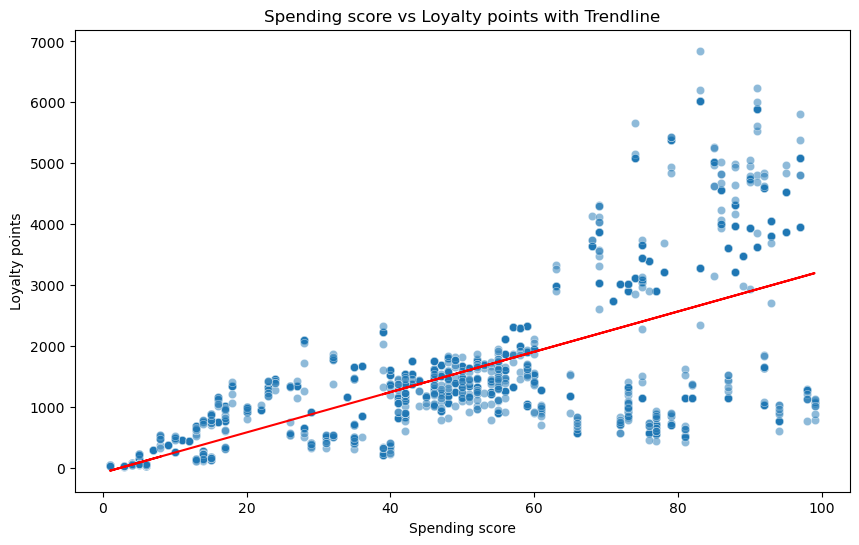

Correlation between Spending score and Loyalty points: 0.6723101119155435


In [33]:
# Use Polyfit method for one variable simple linear regression.
regression = np.polyfit(x, y, deg = 1)

# View the output.
print(f'Coefficients: {regression}')

# Add a trendline to visualize the linear regression.
# Use the NumPy polyval method, and specify the regression and the independent variable.
trendline = np.polyval(regression, x)

# Scatter plot with data using function.
plot_scatter(df3, 'spending_score', 'loyalty_points')

# Add the trendline.
plt.plot(df3['spending_score'], trendline, color='red')

#Add the title
plt.title('Spending score vs Loyalty points with Trendline')

plt.show()

# Calculate the correlation.
correlation = x.corr(y)
print(f'Correlation between Spending score and Loyalty points: {correlation}')

In [34]:
# since np.polifit does not provide statistical output also fitted OLS model. 
# add a constant to the reggression.
X = sm.add_constant(x)

# Fit the model.
model = sm.OLS(y, X).fit()

# Summary of the model.
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 14 Apr 2025   Prob (F-statistic):          2.92e-263
Time:                        12:51:59   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -75.0527     45.931     -1.

In [35]:
# Extract the estimated parameters.
print("Parameters: ", model.params) 

# Extract the standard errors(represent variability in the above across different datasets).
print("Standard errors: ", model.bse) 

# Extract the predicted values.
print("Predicted values: ", model.predict()) 

Parameters:  const            -75.052663
spending_score    33.061693
dtype: float64
Standard errors:  const             45.930554
spending_score     0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


### Observation

at Correlation = 0.672 model suggests a strong positive relationship between spending score and loyalty points, with coefficients at [ 33.06169326 -75.05266293] every 1 unit increase in spending score, increases loyalty points by 33.06. Standard error for spending score (0.8144) is small compared to the coefficient, indicating a precise estimate.

For additional statistical output fitted OLS too: 

R2 at 0.452 suggests moderate towards the high variance as over 45% in loyalty points can be explained by spending score. 

High F-stat (1648) with low p-value (0.000) indicates that the model is good fit. 

Skew (0.422) is below 0.5 indicates that data is approximately symmetrical, but with heavy tails and possibly sharp peak – Kurtosis >3. 

### 5b) renumeration vs loyalty
For linear regression this time will use OLS model for better statistical output. 

In [38]:
# Define independent variable.
X = df3['remuneration']

# Define dependent variable.
y = df3['loyalty_points']

In [39]:
# OLS model requires to add a constant term to the reggression.
X = sm.add_constant(X)

# Fit the model.
model = sm.OLS(y, X).fit()

# Summary of the model.
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 14 Apr 2025   Prob (F-statistic):          2.43e-209
Time:                        12:51:59   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -65.6865     52.171     -1.259   

In [40]:
# Extract the estimated parameters.
print("Parameters: ", model.params) 

# Extract the standard errors.
print("Standard errors: ", model.bse) 

# Extract the predicted values.
print("Predicted values: ", model.predict()) 

Parameters:  const          -65.686513
remuneration    34.187825
dtype: float64
Standard errors:  const           52.170717
remuneration     0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


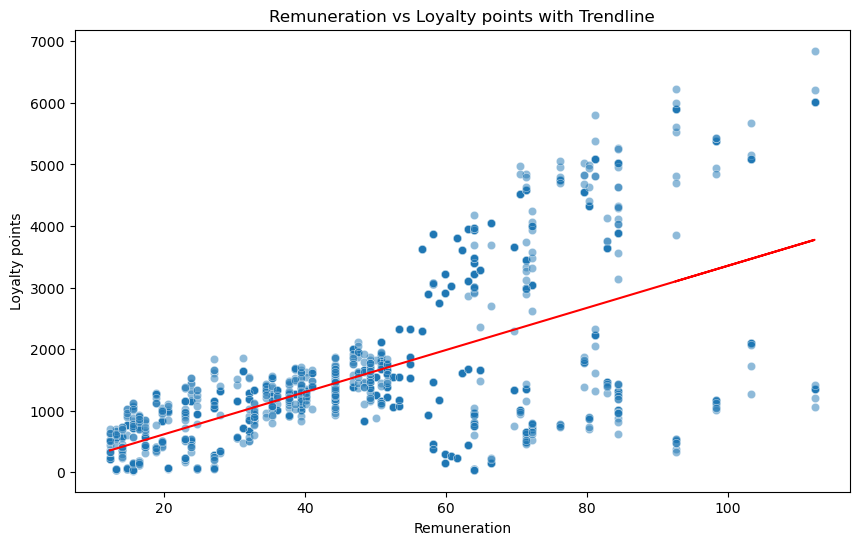

Correlation between Remuneration and Loyalty Points: 0.6160647476356388


In [41]:
# Predicting loyalty points.
predictions = model.predict(X)

# Plotting with function
plot_scatter(df3, 'remuneration', 'loyalty_points')

# Trendline.
plt.plot(df3['remuneration'], predictions, color='red')

plt.title('Remuneration vs Loyalty points with Trendline')
plt.show()

# Calculate the correlation
correlation = df3['remuneration'].corr(df3['loyalty_points'])
print(f'Correlation between Remuneration and Loyalty Points: {correlation}')
    

### Observations:
at 0.616 correlation suggests a strong positive relationship between remuneration and loyalty points, with slope being 34.187825 very 1 unit increase in remuneration, increases loyalty points by 34.19. Standard error for remuneration (0.9779) is small compared to the coefficient, indicating a precise estimate.

R2 (0.380) and adj.R2 (0379) suggests moderate variance as about 38% in loyalty points can be explained by remuneration. 

High F-stat (1222) with low p-value (0.000) indicates that the model is good fit. 

Skew (0.089) is below 0.5 indicates that data is approximately symmetrical, but with heavy tails and possibly sharp peak – Kurtosis >3. 

### 5c) age vs loyalty
initial correlation matrix did not show age's significant relationships with loyalty points and pairplot did not suggest linearity so it is more to satisfy curiosity and to see stats and plot when no relationship is true. 

In [44]:
# Define independent variable.
X  = df3['age']

# Define dependent variable.
y  = df3['loyalty_points']

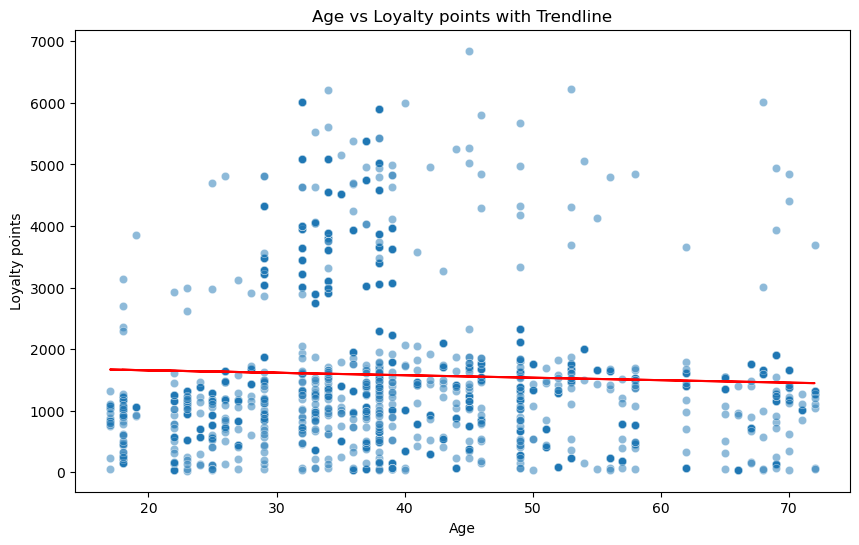

Intercept: 1736.5177393990623
Coefficient: -4.01280514999525
Correlation between Age and Loyalty Points: -0.04244464682054187


In [45]:
#### Will use LinearRegresson model from Scikit-learn
#Independent variable (X), needs to be in a 2D array hence reshape.
X = df3['age'].values.reshape(-1, 1)

# Create the model.
model = LinearRegression()
model.fit(X, y)

# Predictions
predictions = model.predict(X)

# Scatter plot using function.
plot_scatter(df3, 'age', 'loyalty_points')

# Trendline
plt.plot(df3['age'], predictions, color='red')

plt.title('Age vs Loyalty points with Trendline')
plt.show()

# Coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_[0]}')

# Calculate the correlation
correlation = df3['age'].corr(df3['loyalty_points'])
print(f'Correlation between Age and Loyalty Points: {correlation}')

### Observations:
age indeed does not have a meaningful linear relationship with loyalty points in this dataset. Negative correlation ( -0.0424), negative coefficient(-4.01) and meaningless intercept atest to it. 

## MULTIPLE Linear regression

### 5d) spending_score, remuneration, age vs loyalty_points


In [49]:
# Define independent variable.
X  = df3[['spending_score', 'remuneration', 'age']]

# Define dependent variable.
y  = df3['loyalty_points']

In [50]:
# Train-Test split data set into 80% train subset and 20% test subset.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [51]:
# Run regression on the train subset
multilr = LinearRegression()
multilr.fit(X_train, y_train)

# Predictions on the test set
y_pred_test = multilr.predict(X_test)

y_pred_test

array([-4.25709053e+02,  2.99343559e+03,  2.60003812e+03,  1.22401268e+03,
        1.53391529e+03,  1.79212254e+03,  4.18943142e+02,  1.38614741e+03,
        1.36427501e+03,  3.26123743e+03,  1.28766114e+03,  1.65894130e+03,
        1.69575771e+03,  2.33734079e+03,  1.27743942e+03,  1.46204653e+03,
        1.69474080e+03,  8.09214691e+02, -2.63922829e+01, -9.61682267e+02,
        1.55468086e+03,  5.11057805e+01,  1.64730047e+03,  1.29858491e+03,
        1.41546811e+03,  1.42269406e+03,  3.87919648e+03,  1.61275266e+03,
        1.63341589e+03,  1.84791589e+03,  8.88818487e+01,  6.70246855e+02,
        1.00427573e+03,  1.71837726e+03,  1.66852576e+03,  1.28842071e+03,
        8.91492831e+02,  2.09899697e+03,  1.36106930e+03,  1.07872564e+03,
        1.02910663e+03,  1.57353521e+03,  1.40597357e+03,  4.23039314e+03,
        4.27476021e+03, -3.51451403e+02,  1.71837726e+03,  1.53391529e+03,
        1.84020998e+03,  1.77547954e+03,  1.36186127e+03,  8.42143578e+02,
        8.92577110e+02, -

In [52]:
#Evaluate model using 3 metrics:
# 1. Calculate mean absolute error.
mae = metrics.mean_absolute_error(y_test, y_pred_test)
print('Mean Absolute Error:', mae)

# 2. Calculate mean squared error.
mse = metrics.mean_squared_error(y_test, y_pred_test)
print('Mean Squared Error:', mse)

# 3. Calculate root mean squared error.
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Mean Absolute Error: 402.2350305637691
Mean Squared Error: 277188.70233220584
Root Mean Squared Error: 526.4871340614183


In [53]:
#### Print R-squared value for the training set
r2_train = multilr.score(X_train, y_train)
print("R-squared for training set: ", r2_train )

# Print R-squared value for the test set
r2_test = multilr.score(X_test, y_test)
print("R-squared for test set: ", r2_test)


R-squared for training set:  0.8424891786265964
R-squared for test set:  0.8290723396315803


In [54]:
# Compute Adjusted R-squared manualy for both sets since scikit-learn only returns the regular R-squared.
# Number of observations and predictors
n_train = X_train.shape[0]  # number of samples
p_train = X_train.shape[1]  # number of predictors

# Calculate Adjusted R-squared
adjusted_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p_train - 1)

print("Adjusted R-squared for train set:", adjusted_r2_train)


# Number of observations and predictors
n_test = X_test.shape[0]  # number of samples
p_test = X_test.shape[1]  # number of predictors

# Calculate Adjusted R-squared
adjusted_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p_test - 1)

print("Adjusted R-squared for test set:", adjusted_r2_test)


Adjusted R-squared for train set: 0.8421931056540901
Adjusted R-squared for test set: 0.8277774331136378


In [55]:
# Check multicollinearity with VIF.
x_temp = sm.add_constant(X_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor        features
0        20.7           const
1         1.1  spending_score
2         1.0    remuneration
3         1.1             age


### Observations:
1. The increased R2 suggests that the combined model captures more of the underlying relationship between the predictors and the target variable.R2 in training set - 0.842 & similar 0.829 in testing set suggest that model is performing and generalizing well the unseen data. There appears to be no indication of overfitting and performamce appears to be good as about 80% of loyalty_points can be explained by remuneration, spending score and age combined
3. MAE (402.235),  RMSE (526.487) are both significant portions of the mean value of loyalty_points (1578.03) confirming significant prediction errors and not highly accurate model with likely some larger outliers.
4. Multicollinearity using VIF was tested and it was onserved that spending_score, remuneration, and age VIF values are all low (close to 1 and much <5)indicating that these variables are not highly correlated with each other and are well suited for the linear regression model


## 6. Observations and insights

Out of four linear regression models the multilinear one appears to have the best nevertheless moderate predictive performance, but still with large errors and would call for improvement.
Larger errors are likely due to outlieres, but outliers are the most valuable customers too, hence this need to be taken into consideration before, further optimization of the model. 
Further actions -  exploring alternative models, such as decision trees (or random forests), which are more robust to outliers and non-linear relationships. 

# Week 2 assignment: Exploring the structure using decision trees.

The team wants you to use decision trees to attempt to better understand the structure found in the data. You need to grow and prune a decision tree regressor and then visualise and interpret the output.
Make sure to comment on the potential usefulness in decision-making processes and your observations regarding the model.

## Instructions
1. Prepare the data for creating your decision tree. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame with the appropriate columns.
        1. Specify that loyalty points is the target variable (Y) and should be excluded from your input data.
        2. Specify X for the independent variables and y as the dependent variable. Therefore, df\[cols\] will be the independent variables and the column containing loyalty points the dependent variable.
        3. Explore the new DataFrame. 
2. Split the data set into a train and test sets for both X and y at a 70:30 ratio. As previously, random_state=42.
3. Create a decision tree regressor to explore the impact of other features on the loyalty points.
    1. Import the DecisionTreeRegressor class from the sklearn.tree library. 
    2. Create a variable (e.g. regressor) to store the DecisionTreeRegressor() class. (As previously, random_state=42.).
    3. Fit the regressor object to the data set with the fit() function.
    4. Remember to prune your tree using basic pruning strategies and compare the performance before and after applying the pruning strategy.
    5. Plot the final decision tree.
4. Fit a final model and interpret the output.
    1. Justify your selection of pruning strategy implemented and interpret the output.
    2. Evaluate the usefulness of the obtained result and interpret the tree and how it could be used to inform business decisions in the organisation.
5. Summarise (150–200 words) the most important business insights, anything you would like to explore further, and suggested future actions.
 
Back up your work to a safe location. This will allow you to revert to a previous state in the case of making a mistake in the code or deleting a section by mistake. (A simple way of doing this is to save or email a compressed version to yourself at frequent intervals.)


## 1. Load and prepare the data

In [61]:
# Import all the necessary packages
from sklearn.tree import DecisionTreeRegressor, plot_tree 
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

import warnings

# Settings for the notebook.
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15, 10]

In [62]:
# Create your new DataFrame.
df4 = df2

### 1.1 View Data

In [64]:
df4.describe()

,age,remuneration,spending_score,loyalty_points
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000
std,13.573212,23.123984,26.094702,1283.239705
min,17.000000,12.300000,1.000000,25.000000
25%,29.000000,30.340000,32.000000,772.000000
50%,38.000000,47.150000,50.000000,1276.000000
75%,49.000000,63.960000,73.000000,1751.250000
max,72.000000,112.340000,99.000000,6847.000000


In [65]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   object 
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 140.8+ KB


### 1.2 Data Prep
* drop unnecessary columns
* ensure there is no missing values
* encode categorical variables
* check for nulls as they'll throw errors

In [67]:
# Drop columns unnecessary at this stage.
df4 = df4.drop(columns=['review', 'summary'])
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 109.5+ KB


In [68]:
# Any missing values?
missing_values = df4.isna().sum()
missing_values

gender            0
age               0
remuneration      0
spending_score    0
loyalty_points    0
education         0
product           0
dtype: int64

In [69]:
df4['education'].unique()

array(['graduate', 'PhD', 'diploma', 'postgraduate', 'Basic'],
      dtype=object)

In [70]:
# Encode categorical variables. LabelEncoder for 'education' and One-Hot Encoding for 'gender' and 'product'.
# Define the custom order for the 'education' column.
custom_order = ['Basic', 'diploma', 'graduate', 'postgraduate', 'PhD']

# Convert 'education' to a categorical type with the specified order.
df4['education'] = pd.Categorical(df4['education'], categories=custom_order, ordered=True)

# Use LabelEncoder to convert the 'education' column to numeric labels.
le = LabelEncoder()
df4['education_encoded'] = le.fit_transform(df4['education'])

# Apply One-Hot Encoding for the 'gender' and 'product' columns using pd.get_dummies.
df4 = pd.get_dummies(df4, columns=['gender', 'product'], drop_first=True)

# Drop the original 'education' column and keep the encoded one.
df4.drop(columns=['education'], inplace=True)

df4.head()

,age,remuneration,spending_score,loyalty_points,education_encoded,gender_Male,product_123,product_195,product_231,product_249,...,product_10241,product_10270,product_10281,product_10995,product_11003,product_11004,product_11025,product_11056,product_11084,product_11086
0,18,12.30,39,210,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,23,12.30,81,524,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,22,13.12,6,40,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,25,13.12,77,562,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,33,13.94,40,366,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [71]:
# Any missing values? There are 205 variables hence filter.
missing_values = df4.isnull().sum()

# Filter to show only columns that have missing values
missing_values_with_data = missing_values[missing_values > 0]

print(missing_values_with_data)

Series([], dtype: int64)


### Observation: 
df4 is now clean and in the shape required for model building

### 1.3 Define target and the features
* target is loyalty_points
* features - everything else in data frame df4

In [74]:
# Specify Y.
y = df4['loyalty_points']

# Specify X.
X = df4.drop('loyalty_points', axis=1)

In [75]:
# Review X.
print(X.head())

   age  remuneration  spending_score  education_encoded  gender_Male  \
0   18         12.30              39                  3         True   
1   23         12.30              81                  3         True   
2   22         13.12               6                  3        False   
3   25         13.12              77                  3        False   
4   33         13.94              40                  3        False   

   product_123  product_195  product_231  product_249  product_254  ...  \
0        False        False        False        False        False  ...   
1        False        False        False        False        False  ...   
2        False        False        False        False         True  ...   
3        False        False        False        False        False  ...   
4        False        False        False        False        False  ...   

   product_10241  product_10270  product_10281  product_10995  product_11003  \
0          False          False     

In [76]:
# Review y.
print(y)

0        210
1        524
2         40
3        562
4        366
        ... 
1995    4031
1996     539
1997    5614
1998    1048
1999     479
Name: loyalty_points, Length: 2000, dtype: int64


In [77]:
# Create the list of feature variables
feature_cols = [c for c in X.columns]
feature_cols

['age',
 'remuneration',
 'spending_score',
 'education_encoded',
 'gender_Male',
 'product_123',
 'product_195',
 'product_231',
 'product_249',
 'product_254',
 'product_263',
 'product_283',
 'product_291',
 'product_326',
 'product_399',
 'product_405',
 'product_453',
 'product_466',
 'product_486',
 'product_504',
 'product_515',
 'product_518',
 'product_535',
 'product_577',
 'product_615',
 'product_618',
 'product_624',
 'product_629',
 'product_760',
 'product_811',
 'product_815',
 'product_830',
 'product_876',
 'product_930',
 'product_948',
 'product_977',
 'product_978',
 'product_979',
 'product_999',
 'product_1012',
 'product_1031',
 'product_1175',
 'product_1183',
 'product_1212',
 'product_1241',
 'product_1307',
 'product_1459',
 'product_1463',
 'product_1473',
 'product_1497',
 'product_1501',
 'product_1506',
 'product_1577',
 'product_1581',
 'product_1592',
 'product_1618',
 'product_1940',
 'product_1945',
 'product_1970',
 'product_2079',
 'product_2114',


### Observation
there are a lot of features

## 2. Create train and test data sets.

In [80]:
# Split the data into 20% test and 80% train data.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

## 3. Create Decision tree regressor

In [82]:
# Create your decision tree regressor.
dtr = DecisionTreeRegressor(random_state=42)

# Train Decision Tree Regressor
dtr.fit(X_train, y_train)

# Predict loyalty_points on test data.
y_pred = dtr.predict(X_test)

# Predict loyalty_points on test data for evaluation.
y_pred_train = dtr.predict(X_train)

In [83]:
y_pred.shape

(400,)

### 3.1 Evaluate the model by testing accuracy

In [85]:
#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# For R2 evaluation purposes
r2_train = r2_score(y_train, y_pred_train)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print(f"R-squared in train set: {r2_train}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 13225.5
Mean Absolute Error: 29.37
R-squared: 0.9918445313492855
R-squared in train set: 1.0
Root Mean Squared Error: 115.00217389249649


### Observations
The **error metrics** indicate that there is some difference between predicted and actual values, though it's not overly large. Given that mean of loyalty_points is 1578.03 the model, on average, is off by about 115 points (RMSE) when making predictions. ~7% of the average loyalty_points

An R2 value of 0.991 means that about 99.1% of the variance in loyalty_points is explained by the model, and given that R2 is similarly high in both test & train sets with low error values most likely model generalizes well.

### 3.2. Prune the model to various depths and fit for comparison.
* train/fit decition tree again
* predict loyalty_points
* evaluate the acuracy of the model.

In [88]:
# Get the depth of the decision tree.
initial_tree_depth = dtr.get_depth()
print(f"The depth of the initial decision tree is: {initial_tree_depth}")

The depth of the initial decision tree is: 24


#### 3.2.1 max_depth=5

In [90]:
# Prune the model max_depth=5
dtr_5 = DecisionTreeRegressor(max_depth=5, random_state=42)

In [91]:
#Train Decision Tree Regressor
dtr_5.fit(X_train, y_train)

#Predict loyalty_points on test data
y_pred_pruned = dtr_5.predict(X_test)

#Evaluate the pruned model
mse_pruned = mean_squared_error(y_test, y_pred_pruned)
mae_pruned = mean_absolute_error(y_test, y_pred_pruned)
rmse_pruned = mean_squared_error(y_test, y_pred_pruned, squared=False)
r2_pruned = r2_score(y_test, y_pred_pruned)

print(f"Pruned to Depth of 5 Model Mean Squared Error: {mse_pruned}")
print(f"Pruned to Depth of 5 Model Mean Absolute Error: {mae_pruned}")
print(f"Pruned to Depth of 5 Model R-squared: {r2_pruned}")
print(f"Pruned to Depth of 5 Root Mean Squared Error: {rmse_pruned}")

Pruned to Depth of 5 Model Mean Squared Error: 77490.46114717465
Pruned to Depth of 5 Model Mean Absolute Error: 187.4280299176245
Pruned to Depth of 5 Model R-squared: 0.9522157176201133
Pruned to Depth of 5 Root Mean Squared Error: 278.37108532887294


#### Observations to pruned model to deapth of 5
The error metrics went up significantly, hence pruned to max-depth of 5 model makes larger prediction errors. Given that mean of loyalty_points is 1578.03 the model, on average, is off by about 278 points (RMSE) when making predictions. ~18% of the average loyalty_points

An R2 value of 0.952 means that about 95% of the variance in loyalty_points is explained by the model, which is still high & may still suggests overfitting.

Although model has higher errors, the pruned model is likely to perform better on unseen data because it has less complexity, reducing overfitting.

#### 3.2.2 max_depth=8

In [94]:
# Prune the model max_depth=8
dtr_8 = DecisionTreeRegressor(max_depth=8, random_state=42)

In [95]:
#Train Decision Tree Regressor
dtr_8.fit(X_train, y_train)

#Predict loyalty_points on test data
y_pred_pruned = dtr_8.predict(X_test)

#Evaluate the pruned model
mse_pruned = mean_squared_error(y_test, y_pred_pruned)
mae_pruned = mean_absolute_error(y_test, y_pred_pruned)
rmse_pruned = mean_squared_error(y_test, y_pred_pruned, squared=False)
r2_pruned = r2_score(y_test, y_pred_pruned)

print(f"Pruned to Depth of 8 Model Mean Squared Error: {mse_pruned}")
print(f"Pruned to Depth of 8 Model Mean Absolute Error: {mae_pruned}")
print(f"Pruned to Depth of 8 Model R-squared: {r2_pruned}")
print(f"Pruned to Depth of 8 Root Mean Squared Error: {rmse_pruned}")

Pruned to Depth of 8 Model Mean Squared Error: 21305.887149254708
Pruned to Depth of 8 Model Mean Absolute Error: 87.31836327801895
Pruned to Depth of 8 Model R-squared: 0.9868617825623676
Pruned to Depth of 8 Root Mean Squared Error: 145.96536284082848


#### Observations to pruned model to depth of 8

The error metrics went up significantly, pruned to max-depth of 8 model makes larger prediction errors then unpruned, but smaller then one pruned to max_depth of 5. Given that mean of loyalty_points is 1578.03 the model, on average, is off by about 145 points (RMSE) when making predictions. ~9% of the average loyalty_points

An R2 value of 0.986 means that about 99% of the variance in loyalty_points is explained by the model, which is high & may suggests overfitting.

Although model has higher errors, the pruned model is likely to perform better on unseen data because it has less complexity, reducing overfitting.

#### 3.2.3 max_depth=3

In [98]:
# Prune the model max_depth=3
dtr_3 = DecisionTreeRegressor(max_depth=3, random_state=42)

In [99]:
#Train Decision Tree Regressor
dtr_3.fit(X_train, y_train)

#Predict loyalty_points on test data
y_pred_pruned = dtr_3.predict(X_test)

#Evaluate the pruned model
mse_pruned = mean_squared_error(y_test, y_pred_pruned)
mae_pruned = mean_absolute_error(y_test, y_pred_pruned)
rmse_pruned = mean_squared_error(y_test, y_pred_pruned, squared=False)
r2_pruned = r2_score(y_test, y_pred_pruned)

print(f"Pruned to Depth of 3 Model Mean Squared Error: {mse_pruned}")
print(f"Pruned to Depth of 3 Model Mean Absolute Error: {mae_pruned}")
print(f"Pruned to Depth of 3 Model R-squared: {r2_pruned}")
print(f"Pruned to Depth of 3 Root Mean Squared Error: {rmse_pruned}")

Pruned to Depth of 3 Model Mean Squared Error: 141276.38891623393
Pruned to Depth of 3 Model Mean Absolute Error: 271.8726068995849
Pruned to Depth of 3 Model R-squared: 0.9128822985223626
Pruned to Depth of 3 Root Mean Squared Error: 375.86751511168654


#### Observations for pruned model to depth of 3

The error metrics went up significantly, hence pruned to max-depth of 3 model makes largest prediction errors then all other models one Given that mean of loyalty_points is 1578.03 the model, on average, is off by about 376 points (RMSE) when making predictions. ~24% of the average loyalty_points

This model is least complexed out of four an R2 value of 0.912 means that about 91% of the variance in loyalty_points is explained by the model, which is still high & may suggests overfitting.

Although model has higher errors, the pruned model is likely to perform better on unseen data because it has less complexity, reducing overfitting.

#### 3.2.4 max_depth=12 (half of the initial tree depth)

In [102]:
# Prune the model max_depth=12
dtr_12 = DecisionTreeRegressor(max_depth=12, random_state=42)

In [103]:
#Train Decision Tree Regressor
dtr_12.fit(X_train, y_train)

#Predict loyalty_points on test data
y_pred_pruned = dtr_12.predict(X_test)

#Evaluate the pruned model
mse_pruned = mean_squared_error(y_test, y_pred_pruned)
mae_pruned = mean_absolute_error(y_test, y_pred_pruned)
rmse_pruned = mean_squared_error(y_test, y_pred_pruned, squared=False)
r2_pruned = r2_score(y_test, y_pred_pruned)

print(f"Pruned to Depth of 12 Model Mean Squared Error: {mse_pruned}")
print(f"Pruned to Depth of 12 Model Mean Absolute Error: {mae_pruned}")
print(f"Pruned to Depth of 12 Model R-squared: {r2_pruned}")
print(f"Pruned to Depth of 12 Root Mean Squared Error: {rmse_pruned}")

Pruned to Depth of 12 Model Mean Squared Error: 15313.656478190323
Pruned to Depth of 12 Model Mean Absolute Error: 44.29032040665939
Pruned to Depth of 12 Model R-squared: 0.9905568753290468
Pruned to Depth of 12 Root Mean Squared Error: 123.74835949696595


#### Observations for pruned model to depth of 12(half of the initial tree depth)

This has a good balance between model complexity and performance, with an R2 of 0.9906, and it achieves the best RMSE (123.75) after unpruned model. The MAE is also quite low (44.29).

### Observation for all pruned vs unpruned
* Unpruned Model best fits (R2 = 0.99596) but is likely overfitting (good on training data but may perform poorly on unseen data).
* Pruned Depth = 12 offering the best trade-off between complexity and performance,although slightly worse than the unpruned model, it avoids overfitting and generalizes well.
* Pruned Depth = 8 has good balance between bias and variance, providing a strong fit with moderate errors. Likely generalizes well.
* Pruned Depth = 5 has Moderate performance, with larger errors and a slightly worse fit than Depth = 8.
* Pruned Depth = 3 is clearly underfitting, with high error metrics and a low R2. This model is too simple to capture enough of the data's patterns.

**For best performance on training data** and minimal error, the unpruned model is superior.
**For generalization and better handling of overfitting**, the model pruned to a depth of 12, provides good accuracy with reduced complexity.

### 3.3. Evaluate the importance of features in the model pruned to depth 12 (dtr_12) and the unpruned one (dtr)
perhaps there can be less complexed model with good accuracy

#### 3.3.1 the model pruned to depth 12 (dtr_12)

In [108]:
#Extract feature importances
feature_importances_12 = dtr_12.feature_importances_

#Create a DataFrame to display feature importances
feature_importance_df4 = pd.DataFrame({'Feature': feature_cols, 'Importance': feature_importances_12})
feature_importance_df4 = feature_importance_df4.sort_values(by='Importance', ascending=False)

feature_importance_df4.head(10)

,Feature,Importance
1,remuneration,0.501676
2,spending_score,0.482837
0,age,0.013698
3,education_encoded,0.000504
157,product_6720,0.000341
4,gender_Male,0.000331
98,product_3478,0.000217
85,product_2849,0.000077
133,product_5429,0.000051
36,product_978,0.000036


#### 3.3.2 The unpruned (dtr)

In [110]:
#Extract feature importances
feature_importances_unpruned = dtr.feature_importances_

#Create a DataFrame to display feature importances
feature_importance_df4 = pd.DataFrame({'Feature': feature_cols, 'Importance': feature_importances_unpruned})
feature_importance_df4 = feature_importance_df4.sort_values(by='Importance', ascending=False)

feature_importance_df4.head(10)

,Feature,Importance
1,remuneration,0.500662
2,spending_score,0.483518
0,age,0.013565
3,education_encoded,0.000579
4,gender_Male,0.000460
157,product_6720,0.000341
98,product_3478,0.000217
196,product_10281,0.000082
125,product_4470,0.000063
192,product_10232,0.000060


### Observation
the same features - remuneration, spending_score - have significant importance (~50%) in both models, age is the third only slightly contributing feature barely crossing 0.01 treashold. Every other feature falls way behind(0.000). 

### 3.4 Retrain and refit decision tree regresor to data frame with significant features only
in hope of a more efficient, interpretable, and less overfitted model.

In [113]:
# Check the types of columns in dataframe feature_importance_df4.
#print(feature_importance_df4.dtypes)

# Check if there are any non-numeric values
#print(feature_importance_df4.head())

In [114]:
#Set 1% threshold for feature importance
threshold = 0.01

# Find the features where the importance is greater than the threshold.
important_features_1perc = feature_importance_df4[feature_importance_df4['Importance'] > threshold]

# Extract the names of the important features.
important_feature_names = important_features_1perc['Feature'].values

# Filter the X_train and X_test dataframes to include only the important features
X_train_impt_feat = X_train[important_feature_names]
X_test_impt_feat = X_test[important_feature_names]

In [115]:
# Creat decission tree regressor to the train set with selected features only
dtr_impt_feat = DecisionTreeRegressor(random_state=42)

# Train Decision Tree Regressor
dtr_impt_feat.fit(X_train_impt_feat, y_train)

# Predict loyalty_points on test data
y_pred_impt_feat = dtr_impt_feat.predict(X_test_impt_feat)

# For R2 evaluation purposes
y_pred_impt_feat_train = dtr_impt_feat.predict(X_train_impt_feat)

In [116]:
#Evaluate the model accuracy with importance of feature >1%
mse = mean_squared_error(y_test, y_pred_impt_feat)
mae = mean_absolute_error(y_test, y_pred_impt_feat)
rmse = mean_squared_error(y_test, y_pred_impt_feat, squared=False)
r2 = r2_score(y_test, y_pred_impt_feat)

# For R2 evaluation purposes
r2_train = r2_score(y_train, y_pred_impt_feat_train)

print(f"Mean Squared Error with importance of feature >1%: {mse}")
print(f"Mean Absolute Error with importance of feature >1%: {mae}")
print(f"R-squared with importance of feature >1%: {r2}")
print(f"R-squared with importance of feature in train set >1%: {r2_train}") # For R2 evaluation purposes
print(f"Root Mean Squared Error with importance of feature >1%: {rmse}")

Mean Squared Error with importance of feature >1%: 3940.615
Mean Absolute Error with importance of feature >1%: 22.145
R-squared with importance of feature >1%: 0.9975700304641008
R-squared with importance of feature in train set >1%: 1.0
Root Mean Squared Error with importance of feature >1%: 62.77431799709177


## Observation:
compaired to initial model dtr, model where only three signifficant features (>1%) where used is making less sq. errors since MSE is lower, suggesting it might be better at generalizing/more efficient. Lower MAE and RMSE in the feature ajusted model also suggests the predictions are closer to the true values. Very high R2 in training as well as testing sets of feature ajusted model together with relatively low error measures suggest even better fit. 

Reducing the number of features to the most important ones has led to better model performance. With fewer features it appears to be more efficient and seems to generalize better as well as make more accurate predictions.

## 4. Plot final model.
in light of of the above, will plot model ajusted to specific the most significant features and will prune it to observed optimal depth of half of the unpruned model's depth.

### 4.1 Plot feature ajusted but unprunned model

In [ ]:
# Fit and plot final model.
plt.figure(figsize=(15, 10))
plot_tree(dtr_impt_feat, feature_names=feature_cols, filled=True)
#plt.savefig("decision_tree_feat_adjusted.png", dpi=800)
plt.show()

In [ ]:
# Get the depth of the decision tree.
tree_depth = dtr_impt_feat.get_depth()
print(f"The depth of the unpruned feature ajusted decision tree is: {tree_depth}")

### 4.2 Prune the feature ajusted model and plot it
in the data set where all features were used to train the model max_depth of 12(half of the initial tree depth) was the optimal fit for better handling of unseen data, hence will prune the feature ajusted model to 10 and will plot for comparison. 

In [ ]:
# Creat decission tree regressor to the train set with selected features only and prune to depth of 10.
dtr_impt_feat_10 = DecisionTreeRegressor(max_depth=10, random_state=42)

# Train Decision Tree Regressor
dtr_impt_feat_10.fit(X_train_impt_feat, y_train)

# Predict loyalty_points on test data
y_pred_impt_feat = dtr_impt_feat_10.predict(X_test_impt_feat)

# For R2 evaluation purposes
y_pred_impt_feat_train = dtr_impt_feat.predict(X_train_impt_feat)

In [ ]:
#Evaluate the model accuracy with importance of feature >1% & when it is pruned to depth of 10.
mse = mean_squared_error(y_test, y_pred_impt_feat)
mae = mean_absolute_error(y_test, y_pred_impt_feat)
rmse = mean_squared_error(y_test, y_pred_impt_feat, squared=False)
r2 = r2_score(y_test, y_pred_impt_feat)

# For R2 evaluation purposes
r2_train = r2_score(y_train, y_pred_impt_feat_train)

print(f"Mean Squared Error with importance of feature >1% & depth of 10: {mse}")
print(f"Mean Absolute Error with importance of feature >1% & depth of 10: {mae}")
print(f"R-squared with importance of feature >1% & depth of 10: {r2}")
print(f"R-squared with importance of feature in train set >1% & depth of 10: {r2_train}") # For R2 evaluation purposes
print(f"Root Mean Squared Error with importance of feature >1% & depth of 10: {rmse}")

In [ ]:
# Fit and plot model when it was pruned to max depth of 10.
plt.figure(figsize=(15, 10))
plot_tree(dtr_impt_feat_10, feature_names=feature_cols, filled=True, fontsize=6)
#plt.savefig("decision_tree.png", dpi=600)
plt.show()

## Interpret model and note observations.
**Feature ajusted but unpruned model** is ideal if priority is maximum accuracy on the test set, but it may overfit and perform poorly on new, unseen data.

**Feature ajusted and pruned to depth of 10 model** is a better option if generalization is important—it might have slightly worse test set performance, but it's less likely to overfit and should perform more robustly when deployed on new, unseen data. Given that generalization is often more important than raw accuracy, this model is likely the more optimal choice in a real-world scenario where data distribution may change. It would be the safer choice.

# 

# Week 3 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df3`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [ ]:
# Import necessary libraries.
import matplotlib.cm as cm

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist


In [ ]:
# View clean DataFrame.
df2.tail()


In [ ]:
# Drop unnecessary columns.
df5 = df2.drop(columns=['gender', 'age', 'loyalty_points', 'education', 'product','review','summary'])

# View DataFrame.
df5

In [ ]:
# Explore the data.
df5.info()

In [ ]:
# Descriptive statistics.
df5.describe()

## 2. Plot

In [ ]:
# Create a scatterplot with Seaborn using function.
plot_scatter(df5, 'remuneration', 'spending_score')
plt.title('Remuneration vs Spending Score')
plt.show()

In [ ]:
# Create a pairplot with Seaborn.
sns.pairplot(df5, vars=['remuneration', 'spending_score'], diag_kind= 'kde')

## Observations:
the initial scatterplot of two earlier confirmed non-correlating independent variables remuneration and spending_score shows data points distributed in roughly 5 clusters.

Pairplot does the same. In addition it shows that spending_score values are more evenly distributed with majority of customers having average spending score with similar numbers at the lower as well as higher ends of the range. Remuneration however is slightly skewed to the right suggesting some high earners, but the bulk of customers are also firmly in the middle and lower end.

## 3. Elbow and silhoutte methods

Given the above observation will elbow and silhouette methods show similar clustering?

In [ ]:
# Select both features/columns from df5.
x = df5[['remuneration', 'spending_score']].values

print(x.shape)

In [ ]:
# Determine the number (or the range of clusters )of clusters: Elbow method.
elb = []
for i in range(1, 10):
    kmeans_e = KMeans(n_clusters=i, init='k-means++', max_iter=500, random_state=42)
    kmeans_e.fit(x)
    elb.append(sum(np.min(cdist(x, kmeans_e.cluster_centers_, 'euclidean'),axis=1)) / x.shape[0])

# Plot
plt.plot(range(1, 10), elb, marker='o')
plt.show()

In [ ]:
# Determine the number or the range of clusters: Silhouette method.
sil = []
kmax = 10
for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k, random_state=30).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

# Plot
plt.plot(range(2, kmax+1), sil, marker='o')
plt.show()

## Observation
It appears that elbow method shows clear elbow at 5 and after K=5 SSE starts decreasing slowly. Silhouette method's highest point is too at 5 on the plot, what in turn would suggest 5 is the optimal number for clusters. However, Silhouette method's plot has the secondary peak at 8 possibly indicationg laten substructure in the data e.g. distinct behaviors or profiles within a high-value customer segment.

## 4. Evaluate k-means model at different values of *k*

k=5 clusters were found to be optimal number for the model, but will evaluate k=8 too.

In [ ]:
# Evaluate 5 clusters model.
x = pd.DataFrame(x, columns=['remuneration', 'spending_score'])

kmeans = KMeans(n_clusters = 5, max_iter = 500, init = 'k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

sns.pairplot(x, hue="K-Means Predicted", diag_kind= 'kde')

In [ ]:
# Check the number of observations per predicted class in model with 5 clusters.
x['K-Means Predicted'].value_counts()

### Observation:
5 clusters model looks very similar to initial exploratory pairplot in terms clusters and seems to split dataset into optimal number of groups.

In [ ]:
# Evaluate 8 clusters model.

#Import patches for custom legend since seaborn.pairplot was not showing legend correctly.
import matplotlib.patches as mpatches

x = pd.DataFrame(x, columns=['remuneration', 'spending_score'])

kmeans = KMeans(n_clusters = 8, max_iter = 500, init = 'k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Create the pairplot
g = sns.pairplot(x, hue="K-Means Predicted", diag_kind='kde', palette='tab20')

# Get the unique cluster labels and colors
cluster_labels = sorted(x['K-Means Predicted'].unique())
palette = sns.color_palette('tab20', n_colors=len(cluster_labels))

# Manually create legend handles
handles = [mpatches.Patch(color=palette[i], label=f'Cluster {cluster_labels[i]}') for i in range(len(cluster_labels))]

# Remove the existing legend and add the custom one
g._legend.remove()
g.fig.legend(handles=handles, title='K-Means Predicted', loc='upper right', bbox_to_anchor=(1.15, 0.85))

In [ ]:
# Check the number of observations per predicted class in model with 8 clusters.
x['K-Means Predicted'].value_counts()

## 5. Fit final model and justify your choice

In [ ]:
# Final model with 8 clusters.
x = pd.DataFrame(x, columns=['remuneration', 'spending_score'])

kmeans = KMeans(n_clusters = 8, max_iter = 500, init = 'k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Create the pairplot
g = sns.pairplot(x, hue="K-Means Predicted", diag_kind='kde', palette='tab20')

# Get the unique cluster labels and colors
cluster_labels = sorted(x['K-Means Predicted'].unique())
palette = sns.color_palette('tab20', n_colors=len(cluster_labels))

# Manually create legend handles
handles = [mpatches.Patch(color=palette[i], label=f'Cluster {cluster_labels[i]}') for i in range(len(cluster_labels))]

# Remove the existing legend and add the custom one
g._legend.remove()
g.fig.legend(handles=handles, title='K-Means Predicted', loc='upper right', bbox_to_anchor=(1.15, 0.85))

## Observation
Even though k=5 may be the "optimal" choice from a silhouette or elbow method perspective, k=8 does seem to uncover:
* Smaller, more specialized customer segments that more generic model k=5 would miss
* Potential niche marketing opportunities (e.g., a small but high-spending group that behaves differently)

## 6. Plot and interpret the clusters

In [ ]:
# Visualising the clusters.
# View the K-Means predicted.
print(x.head(10))


In [ ]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(10, 6)})
sns.set(style="white")

# Create a scatterplot.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x,
                hue='K-Means Predicted',
                palette='tab20',
                s=70)
# Set the title
plt.title("8 Clusters of Customers: Spending Behavior vs. Income", fontsize=16)

# Move the legend outside
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Basic statistics to further understand each cluster.
x.groupby('K-Means Predicted')[['remuneration', 'spending_score']].describe()

In [ ]:
# Rename clusters and plot for clarity.
cluster_map = {
    0: "0 - Moderate Earners & Spenders",
    1: "1 - High Earners, Low Spenders",
    2: "2 - Premium Customers",
    3: "3 - Aspirational Spenders",
    4: "4 - Low Budget Segment",
    5: "5 - Untapped High Earners",
    6: "6 - Loyal High Spenders",
    7: "7 - Mass Market"
}

x['Segment'] = x['K-Means Predicted'].map(cluster_map)

x['Segment'].value_counts().plot(kind='barh', figsize=(10,6), color='skyblue')
plt.title("Customer Segments by Cluster Size", fontsize=16)
plt.xlabel("Number of Customers")
plt.tight_layout()
plt.show()


## Observation
After renaming the 8 clusters based on the mean remuneration and spending score, the resulting visualization highlights distinct customer segments, such as high-income, high-spending customers, and low-income, low-spending ones. These segments offer valuable insights for bussines. By recognizing these nuanced groups, marketing can adopt more personalized strategies to enhance customer engagement and retention retention.

# Week 4 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## **Aproach**
* `review` is the main column of relevance based on the most amount of info for the task and `summary`column is assumed to be header of sorts, hence only the `review` column will be explored for sentiment analysis.
* no duplicates where observed at the early stages of data exploration hence all 2000 `review`column values will be treated as valid.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [ ]:
# Import all the necessary packages.
import nltk 
import os 

nltk.download ('punkt')
nltk.download ('stopwords')
nltk.download('averaged_perceptron_tagger')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
from nltk.corpus import wordnet as wn
from nltk import pos_tag
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Import Counter.
from collections import Counter

In [ ]:
# View DataFrame.
df2.head()

In [ ]:
# Explore data set.
df2.info()

In [ ]:
# Drop unnecessary columns and keep 'summary' for future ref if needed.
df6 = df2.drop(columns=['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product'])

# View DataFrame.
df6.info()

In [ ]:
# Recheck whether any missing values occured.
print(df6['review'].isna().sum())
df6['summary'].isna().sum()

## 1.1 Functions

In [ ]:
# Returns a sentiment score as a dictionary for ea piece of text using VADER(good w social media/informal language).
def analyze_sentiment(text):
    """It takes a list of words (text), joins them into a single string, 
    and then checks how positive or negative the full sentence is by using VADER.
    """
    return analyzer.polarity_scores(' '.join(text))

# Returns one of three sentiment labels.
def get_sentiment_label(compound):
    """ It uses recommended number within the standard VADER tresholds (-1 and 1)
    to assign a label: positive, negative, or neutral to compound score.
    """
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Returns polarity score for each piece of text using TextBlob(simpler,more traditional, works off a lexicon and grammar rules).
def generate_polarity(review):
    """Extracts polarity score (-1 to +1) for each piece of text
    by using TextBlob
    """
    return TextBlob(review).sentiment.polarity


## 2. Prepare the data for NLP

### 2a) Change to lower case and join the elements in relevant review column only

In [ ]:
# 'review' column: Change all to lower case and join words with a space into single string.
df6['review'] = df6['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview.
df6['review'].head()

### 2b) Replace punctuation in relevant 'review' column only

In [ ]:
# Replace all the punctuations in review column.
df6['review'] = df6['review'].str.replace(r"[^\w\s]", "", regex=True)

# View output.
df6['review'].head()

### 2c) Drop duplicates in both columns

**Approach** Since no duplicates where observed at the early stages of data exploration hence all 2000 `review`column values will be treated as valid.

In [ ]:
# Check the number of duplicate values in the column.
#df6.review.duplicated().sum()

In [ ]:
# Drop duplicates in both columns.
#df6 = df6.drop_duplicates(subset='review', keep='first').reset_index(drop=True)

# View DataFrame.
#df6

## 3. Tokenise, create wordclouds, lemmatize and check frequency distribution 

In [ ]:
# Create copy of DataFrame df6.
df7 = df6

# View DataFrame.
df7.info()

In [ ]:
# Apply tokenisation to 'review'.
df7['review_tokens'] = df7['review'].apply(word_tokenize)

# View DataFrame.
df7.head()

In [ ]:
# Define an empty list of review_tokens.
all_review_tokens = []

for i in range(df7.shape[0]):
    # Add each token to the list.
    all_review_tokens = all_review_tokens + df7['review_tokens'][i]

### 3.1 Check the most frequently occurring words

In [ ]:
# Calculate the frequency distribution among all_review_tokens.
fdist_review = FreqDist(all_review_tokens)

# Preview data.
fdist_review

### 3.2 Further filter out tokens that are not alphabetic nor numbers and eliminate stopwords

In [ ]:
# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

In [ ]:
# Filter out 'review_tokens' to only have alphanumeric & number values and apply stopword removal variable for each row in df7
df7['review_tokens_no_stopwords'] = df7['review_tokens'].apply(
    lambda tokens: [word for word in tokens if word.isalnum() and word.lower() not in english_stopwords]
)

In [ ]:
df7.tail()

### 3.4 Create and plot a WordCloud

In [ ]:
# Define an empty string variable.
review_tokens_no_stopwords_string = ''

#for value in df7['review_tokens_no_stopwords']:
    # Add each filtered token word to the string. Later to be used for wordcloud.
    #review_tokens_no_stopwords_string = review_tokens_no_stopwords_string + value + ' '

# Loop through each row in 'review_tokens_no_stopwords' column
for tokens in df7['review_tokens_no_stopwords']:
    #Loop through each token in the list of tokens
    for value in tokens:
        # Add each token to the string with a space in between. String required for WordCloud
        review_tokens_no_stopwords_string += value + ' '

# Create a WordCloud for review.
wordcloud_review = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='twilight', 
                min_font_size = 10).generate(review_tokens_no_stopwords_string) 

# Plot the WordCloud for review.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_review) 
plt.axis('off')
plt.tight_layout(pad = 0) 
plt.show()

In [ ]:
# View the frequency distribution of tokenized review column words.

# Combine all tokens from the 'review_tokens_no_stopwords' column into a single list
all_tokens_no_stopwords = [token for tokens in df7['review_tokens_no_stopwords'] for token in tokens]

# Calculate the frequency distribution
fd_review = FreqDist(all_tokens_no_stopwords)

# Display the frequency distribution
fd_review


### Observation
frequency distribution of tokenized review column words suports the visual of WordCloud by assigning counts to most frequently occurring words in customer reviews, but other than that does not really provide much of an insight. 

**Next** lemmatize the review_tokens_no_stopwords to see whether frequency distribution changes.

### 3.5. Lemmatize tokenised reviews

In [ ]:
# Initialize the lemmatizer.
lemmatizer = WordNetLemmatizer()

# Define the tag map for POS tagging.
tag_map = defaultdict(lambda: wn.NOUN)  # Default to NOUN
tag_map['J'] = wn.ADJ  # Adjectives
tag_map['V'] = wn.VERB  # Verbs
tag_map['R'] = wn.ADV  # Adverbs

# Lemmatize the tokens in 'review_tokens_no_stopwords' with POS tagging.
df7['review_tokens_lemmatized'] = df7['review_tokens_no_stopwords'].apply(
    lambda tokens: [
        lemmatizer.lemmatize(word, pos=tag_map[tag[0]])  # Uses the first letter of the tag (e.g., 'N', 'V')
        for word, tag in nltk.pos_tag(tokens)
    ]
)

In [ ]:
df7.tail()

In [ ]:
# View the frequency distribution of 'review_tokens_lemmatized'column words.

# Combine all tokens from the 'review_tokens_lemmatized' column into a single list
all_tokens_lemmatized = [token for tokens in df7['review_tokens_lemmatized'] for token in tokens]

# Calculate the frequency distribution
fd_review_lem = FreqDist(all_tokens_lemmatized)

# Display the frequency distribution
fd_review_lem

### 3.6 Identify 15 most common words in tokenized reviews and in lemmatized reviews for comparison 

In [ ]:
# Determine the 15 most common words and their frequencies in 'review_tokens_no_stopwords'.
most_common_words = fd_review.most_common(15)
most_common_words

In [ ]:
# Determine the 15 most common words and their frequencies in 'review_tokens_lemmatized'.
most_common_words_lem = fd_review_lem.most_common(15)
most_common_words_lem

In [ ]:
# Plot both above outputs for comparison.
# Extract words and their frequencies from most_common_words.
words, freqs = zip(*most_common_words)

# Extract words and their frequencies from most_common_words_lem.
words_lem, freqs_lem = zip(*most_common_words_lem)

# Create subplots for both sets of most common words.
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for tokens.
axes[0].barh(words, freqs, color='skyblue')
axes[0].set_title('Most Common Words in Tokenised only Reviews')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Words')

# Plot for lemmatized tokens.
axes[1].barh(words_lem, freqs_lem, color='lightgreen')
axes[1].set_title('Most Common Words in Lemmatized Reviews')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Words')

# Adjust layout.
plt.tight_layout()
plt.show()


## Observation
The difference in the most common words in reviews pre and post lemmatization is not very dissimilar. This may be due to simple text structure as reviews don't have many complex inflections or variations hence lemmatization does not dramatically change unique tokens.
Nevertheless,lemmatization does simplify and improve quality of data as well as reduces the size of vocabulary, hence will test whether there is significant difference in polarity and sentiment analysis using VADER and TextBlob on raw reviews and tokenized lemmatized version of it.

## 4. Polarity and sentiment inc.plots

In [ ]:
# Create additional column in df7 to hold tokenized & lemmatized reviews as string to use by TextBlob later
df7['review_clean_string'] = df7['review_tokens_lemmatized'].apply(lambda x: ' '.join(x))
df7.head(1)

#### 4.1 using VADER

In [ ]:
df2.head(1)

#### 4.1.1 on raw unprocessed reviews

In [ ]:
# Determine polarity for raw, including with punctuation reviews.
# Create the tool that can meassure the sentiment in a piece of text.
analyzer = SentimentIntensityAnalyzer()

# Create new column to append results after applying the function analyze_sentiment to df2['review'] that has punctuation & capital letters.
df7['sentiment_scores_r_VADER'] = df2['review'].apply(analyze_sentiment)

df7.head(1)

In [ ]:
# Extract individual sentiment scores and split it into 4 additional columns.
df7['neg_r'] = df7['sentiment_scores_r_VADER'].apply(lambda x: x['neg'])
df7['neu_r'] = df7['sentiment_scores_r_VADER'].apply(lambda x: x['neu'])
df7['pos_r'] = df7['sentiment_scores_r_VADER'].apply(lambda x: x['pos'])
df7['compound_r'] = df7['sentiment_scores_r_VADER'].apply(lambda x: x['compound'])

df7.head(1)

In [ ]:
# Determine overall sentiment by runing the function to assign respective sentiment label in a new column.         
df7['overall_sentiment_r_VADER'] = df7['compound_r'].apply(get_sentiment_label)
df7.head(1)

In [ ]:
#### Plot the sentiment distribution.
# Sentiment labels
sentiment_labels = df7['overall_sentiment_r_VADER']

# Set the color palette for the plot
color_palette = ['lightgreen', 'skyblue', 'red',]

# Create the seaborn countplot
plt.figure(figsize=(8, 6))
sns.countplot(x=sentiment_labels, palette=color_palette)

# Customize plot labels and title
plt.title("VADER Method Sentiment Distribution for Unprocessed Reviews")
plt.xlabel("Sentiment Label")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)

# Show the plot
plt.show()

#### Observation
When VADER is applied to raw, unprocessed reviews (with punctuation and capitalization), it fails to detect any strong negative sentiment.

#### 4.1.2 on tokens_lemmatized reviews

In [ ]:
# Create new column to append results after applying the function analyze_sentiment.
df7['sentiment_scores_t_l_VADER'] = df7['review_tokens_lemmatized'].apply(analyze_sentiment)

df7.head(1)

In [ ]:
# Extract individual sentiment scores and split it into 4 additional columns.
df7['neg_t_l'] = df7['sentiment_scores_t_l_VADER'].apply(lambda x: x['neg'])
df7['neu_t_l'] = df7['sentiment_scores_t_l_VADER'].apply(lambda x: x['neu'])
df7['pos_t_l'] = df7['sentiment_scores_t_l_VADER'].apply(lambda x: x['pos'])
df7['compound_t_l'] = df7['sentiment_scores_t_l_VADER'].apply(lambda x: x['compound'])
df7.head(1)

In [ ]:
# Determine overall sentiment by runing the function to assign respective sentiment label in a new column.         
df7['overall_sentiment_t_l_VADER'] = df7['compound_t_l'].apply(get_sentiment_label)
df7.head(1)

In [ ]:
# Plot the sentiment distribution.
# Sentiment labels
sentiment_labels = df7['overall_sentiment_t_l_VADER']

# Set the color palette for the plot
color_palette = ['red', 'lightgreen', 'skyblue']

# Create the seaborn countplot
plt.figure(figsize=(8, 6))
sns.countplot(x=sentiment_labels, palette=color_palette)

# Customize plot labels and title
plt.title("VADER Method Sentiment Distribution for Tokenized & Lemmatized Reviews")
plt.xlabel("Sentiment Label")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)

# Show the plot
plt.show()

#### Observation
when VADER is applied to tokenized and lemmatized reviews (with punctuation removed), it produces mostly positive sentiment, with a small number of negative and neutral reviews.

### 4.2 using TextBlob

#### 4.2.1 on punctuation removed, but otherwise unprocessed reviews

In [ ]:
# Apply the polarity function to extract polatity score for each review using TextBlob and output results in the new column.
df7['polarity_score_r_TextBlob'] = df7['review'].apply(generate_polarity)

In [ ]:
# Determine overall sentiment by runing the function to assign respective sentiment label in a new column. 
df7['overall_sentiment_r_TextBlob'] = df7['polarity_score_r_TextBlob'].apply(get_sentiment_label)

# Display the DataFrame with new columns
df7.head(1)

In [ ]:
# Plot the sentiment distribution on TextBlob output.
# Sentiment labels
sentiment_labels = df7['overall_sentiment_r_TextBlob']

# Set the color palette for the plot
color_palette = ['skyblue', 'lightgreen', 'red']

# Create the seaborn countplot
plt.figure(figsize=(8, 6))
sns.countplot(x=sentiment_labels, palette=color_palette)

# Customize plot labels and title
plt.title("TextBlob Method Sentiment Distribution for Unrocessed Reviews")
plt.xlabel("Sentiment Label")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)

# Show the plot
plt.show()

#### 4.2.2 on tokens_lemmatized reviews

In [ ]:
# Apply the polarity function to extract polatity score for each review using TextBlob and output results in the new column.
df7['polarity_score_t_l_TextBlob'] = df7['review_clean_string'].apply(generate_polarity)

In [ ]:
# Determine overall sentiment by runing the function to assign respective sentiment label in a new column. 
df7['overall_sentiment_t_lTextBlob'] = df7['polarity_score_t_l_TextBlob'].apply(get_sentiment_label)

# Display the DataFrame with new columns
df7.head(1)

In [ ]:
# Plot the sentiment distribution on TextBlob output.
# Sentiment labels
sentiment_labels = df7['overall_sentiment_t_lTextBlob']

# Set the color palette for the plot
color_palette = ['red','skyblue', 'lightgreen']

# Create the seaborn countplot
plt.figure(figsize=(8, 6))
sns.countplot(x=sentiment_labels, palette=color_palette)

# Customize plot labels and title
plt.title("TextBlob Method Sentiment Distribution for Tokenized & Lemmatized Reviews")
plt.xlabel("Sentiment Label")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)

# Show the plot
plt.show()

### Observation
TextBlob, on both pre-processed and lemmatized reviews, returns a lower number of positive results than VADER, but still detects very few negative and neutral sentiments.

## 5. Review polarity and sentiment: VADER vs TextBlob

### 5.1 unprocessed reviews

In [ ]:
# Plot the sentiment analysis output VADER vs TextBlob.
# Count the sentiment labels for both VADER and TextBlob.
vader_counts = df7['overall_sentiment_r_VADER'].value_counts()
textblob_counts = df7['overall_sentiment_r_TextBlob'].value_counts()

# Combine the counts into a DataFrame for easier plotting.
sentiment_df = pd.DataFrame({
    'VADER': vader_counts,
    'TextBlob': textblob_counts
}).fillna(0)  

# Plot the results side by side using seaborn.
ax = sentiment_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])

# Customize the plot.
plt.title('Comparison of Review Sentiment: VADER vs TextBlob on Unprocessed Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=0) 
plt.legend(title='Sentiment Method', loc='upper left', bbox_to_anchor=(1.05, 1))

# Add counts above each bar.
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Displays the height as integer.
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Positions the label.
                ha='center', va='center',  # Aligns the text.
                fontsize=10, color='black',  
                xytext=(0, 5),  # Distance of the text from the bar.
                textcoords='offset points')

plt.show()

### 5.2 on tokens_lemmatized reviews

In [ ]:
# Plot the sentiment analysis output VADER vs TextBlob.
# Count the sentiment labels for both VADER and TextBlob.
vader_counts = df7['overall_sentiment_t_l_VADER'].value_counts()
textblob_counts = df7['overall_sentiment_t_lTextBlob'].value_counts()

# Combine the counts into a DataFrame for easier plotting.
sentiment_df = pd.DataFrame({
    'VADER': vader_counts,
    'TextBlob': textblob_counts
}).fillna(0)  

# Plot the results side by side using seaborn.
ax = sentiment_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])

# Customize the plot.
plt.title('Comparison of Review Sentiment: VADER vs TextBlob on Tokenized Lemmatized Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=0) 
plt.legend(title='Sentiment Method', loc='upper left', bbox_to_anchor=(1.05, 1))

# Add counts above each bar.
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Displays the height as integer.
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Positions the label.
                ha='center', va='center',  # Aligns the text.
                fontsize=10, color='black',  
                xytext=(0, 5),  # Distance of the text from the bar.
                textcoords='offset points')

plt.show()

## Observation
While VADER is intended to work best on raw text, in practice it may fail to detect negative sentiment when that sentiment is expressed mildly or indirectly. It appears that tokenization and lemmatization improves detection by helping VADER match sentiment-bearing words more reliably.
TextBlob tends to produce lower sentiment scores overall, but struggles similarly with negative sentiment detection. 

Ultimately, both models reveal an overall positive sentiment trend, which may reflect either a true bias in the reviews themselves or limitations in these lexicon-based sentiment tools when handling subtle or mixed emotional to.ne


## 6. Identify top 20 positive and negative reviews
will use 'compound' column for VADER output and 'polarity_score_TextBlob' TextBlob

### 6.1 VADER

###  6.1.1 raw pre-processed reviews

In [ ]:
# Top 20 negative reviews.
# Sort the df7 by the 'compound_r' column in ascending order.
top_negative_reviews = df7.sort_values(by='compound_r').head(20)

# Display the top 20 reviews with the most negative sentiment
print(top_negative_reviews[['review', 'compound_r']])


In [ ]:
# Top 20 positive reviews.
# Sort the df7 by the 'compound_r' column in descending order.
top_positive_reviews = df7.sort_values(by='compound_r', ascending=False).head(20)

# Display the top 20 reviews with the most positive sentiment (highest compound scores)
print(top_positive_reviews[['review', 'compound_r']])


### Observation
* When trying to get the 20 "most negative" reviews, it didn’t find any with truly negative scores — most were neutral (compound score = 0).*  Manual skim shows many of these “neutral” reviews were actually positive, suggesting VADER's scoring was inaccurate
* 20 0 "most positive" reviews were accurately labeled as positive — VADER is reliable with positivity, as expecte.


###  6.1.2 tokenized and lemmatized reviews 

In [ ]:
# Top 20 negative reviews.
# Sort the df7 by the 'compound_r' column in ascending order.
top_negative_reviews = df7.sort_values(by='compound_t_l').head(20)

# Display the top 20 reviews with the most negative sentiment
print(top_negative_reviews[['review', 'compound_t_l']])

In [ ]:
# to read any given full review.
#print(df7.loc[551, 'review'])

### Observation:
* Positive detection remains strong — 20/20 labeled positives were indeed positive.*  Negative detection is less reliable 
11/20 were truly negati, e
6 were actually posit, ve
2–3 were neu. l
→ That’s 45% misclassification in the “most negative” samples.


### 6.2 TextBlob

###  6.2.1 punctuation removed, but otherwise pre-processed reviews

In [ ]:
# Top 20 negative reviews.
# Sort the df7 by the 'polarity_score_r_TextBlob' column in ascending order.
top_negative_reviews = df7.sort_values(by='polarity_score_r_TextBlob').head(20)

# Display the top 20 reviews with the most negative sentiment
print(top_negative_reviews[['review', 'polarity_score_r_TextBlob']])


In [ ]:
# Read any given review
#print(df7.loc[1359, 'review'])

In [ ]:
# Top 20 positive reviews.
# Sort the df7 by the 'polarity_score_r_TextBlob' column in descending order.
top_positive_reviews = df7.sort_values(by='polarity_score_r_TextBlob', ascending=False).head(20)

# Display the top 20 reviews with the most positive sentiment
print(top_positive_reviews[['review', 'polarity_score_r_TextBlob']])


### Observation:
* Manualy skimming through showed that positives were solid.*  Among the "most negative" 2, 
12 were truly negati, e
5 were actually posit, ve
3 neu. l
→ So, 40% were misclassified — slightly better than VADER, but still flwed.


###  6.2.2 tokenized and lemmatized reviews 

In [ ]:
# Top 20 negative reviews.
# Sort the df7 by the 'overall_sentiment_t_lTextBlob' column in ascending order.
top_negative_reviews = df7.sort_values(by='overall_sentiment_t_lTextBlob').head(20)

# Display the top 20 reviews with the most negative sentiment
print(top_negative_reviews[['review', 'overall_sentiment_t_lTextBlob']])


In [ ]:
# Top 20 positive reviews.
# Sort the df7 by the 'overall_sentiment_t_lTextBlob' column in descending order.
top_positive_reviews = df7.sort_values(by='overall_sentiment_t_lTextBlob', ascending=False).head(20)

# Display the top 20 reviews with the most positive sentiment
print(top_positive_reviews[['review', 'overall_sentiment_t_lTextBlob']])


### Observation
* Positives again were reliable — all 20 labeled positives were indeed positive.*  Negatives had mixed accuracy 
10 were truly negati, e
8 were actually posit, ve
2 were neu. l
→ That’s 50% misclassified or uncear.


## Observations
Overall, 
* positive sentiment detection is consistently strong across all methods and text formats. This supports the idea that positive sentiment is easier to detect — more direct, more strongly worded, and better represented in sentiment lexicons. 
* Negative sentiment is harder to detect — especially by VADER. This supports the known limitation of VADER where it underperforms on indirect, nuanced, or less emotionally-charged negative sentiment. TextBlob performs slightly better on negative sentiment than VADER, but still weak overall.
* Preprocessing and lemmatization may improve detection modestly, but the inherent limitations of lexicon-based models mean they are prone to underestimating or misclassifying negative sentiment, especially when expressed in a subtle or indirect way.

#### 